# **Stock Market Trend Analysis Using Yahoo Finance Data**

**Introduction:**

This project involves analyzing historical stock prices for five companies (AAPL, TSLA, GOOGL, AMZN, and MSFT) using Yahoo Finance data. We'll identify trends, evaluate risk, and apply key financial indicators like moving averages and Bollinger Bands.

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

**LOAD HISTORICAL STOCK DATA**

In [5]:
# Define stock tickers
stock_tickers = ['AAPL', 'AMZN', 'MSFT', 'GOOGL', 'TSLA']


In [6]:
# Download historical data
data = {}
for ticker in stock_tickers:
    data[ticker] = yf.download(ticker, period='5y')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


**DATA CLEANING**

In [10]:
# Handle missing values
for ticker, df in data.items():
    df.fillna(method='ffill', inplace=True)

# Calculate daily returns
for ticker, df in data.items():
    df['Return'] = df['Close'].pct_change()

In [12]:
df.columns

MultiIndex([( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA'),
            ('Return',     '')],
           names=['Price', 'Ticker'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-04-28 to 2025-04-28
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   1257 non-null   float64
 1   (High, TSLA)    1257 non-null   float64
 2   (Low, TSLA)     1257 non-null   float64
 3   (Open, TSLA)    1257 non-null   float64
 4   (Volume, TSLA)  1257 non-null   int64  
 5   (Return, )      1256 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.7 KB


In [16]:
df.head()

Price           Close       High        Low       Open     Volume    Return
Ticker           TSLA       TSLA       TSLA       TSLA       TSLA          
Date                                                                       
2020-04-28  51.274666  53.666668  50.445999  53.042667  228330000       NaN
2020-04-29  53.367332  53.546665  52.210667  52.678001  243240000  0.040813
2020-04-30  52.125332  57.987999  50.900002  57.012669  427078500 -0.023273
2020-05-01  46.754665  51.518002  45.535999  50.333332  487977000 -0.103034
2020-05-04  50.745998  50.799999  46.533333  46.733334  288556500  0.085368

In [18]:
df.isnull().sum()

Price   Ticker
Close   TSLA      0
High    TSLA      0
Low     TSLA      0
Open    TSLA      0
Volume  TSLA      0
Return            1
dtype: int64

**Calculate and Plot moving Average**

In [21]:
# Calculate moving averages
for ticker, df in data.items():
    df['50-day MA'] = df['Close'].rolling(window=50).mean()
    df['200-day MA'] = df['Close'].rolling(window=200).mean()

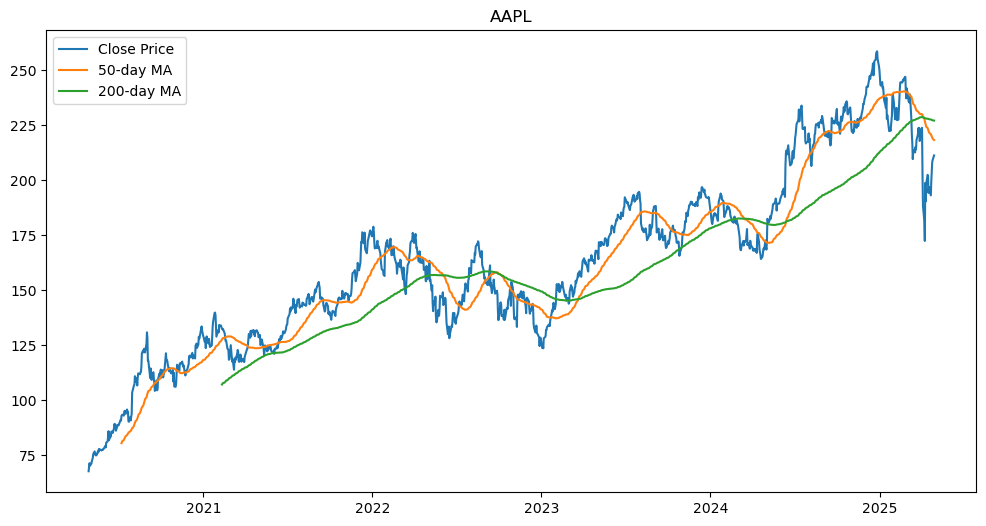

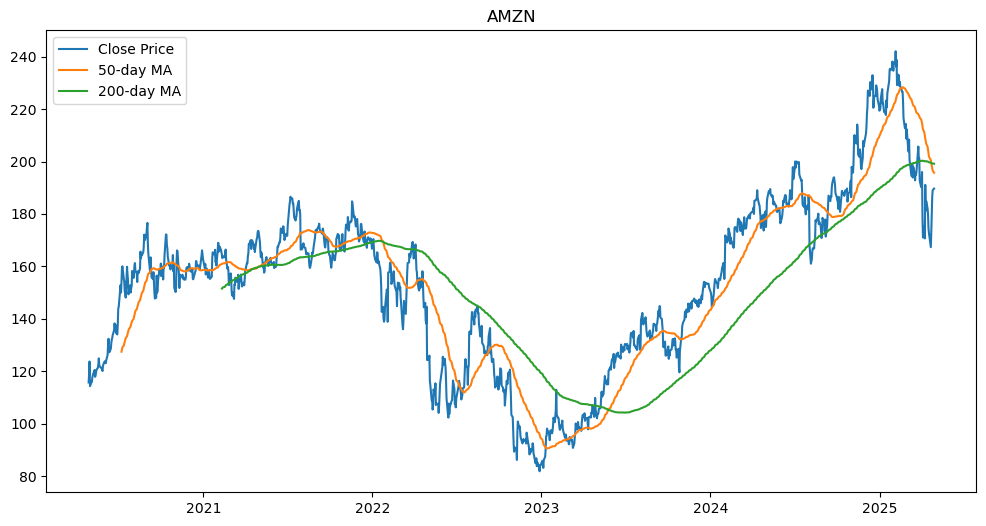

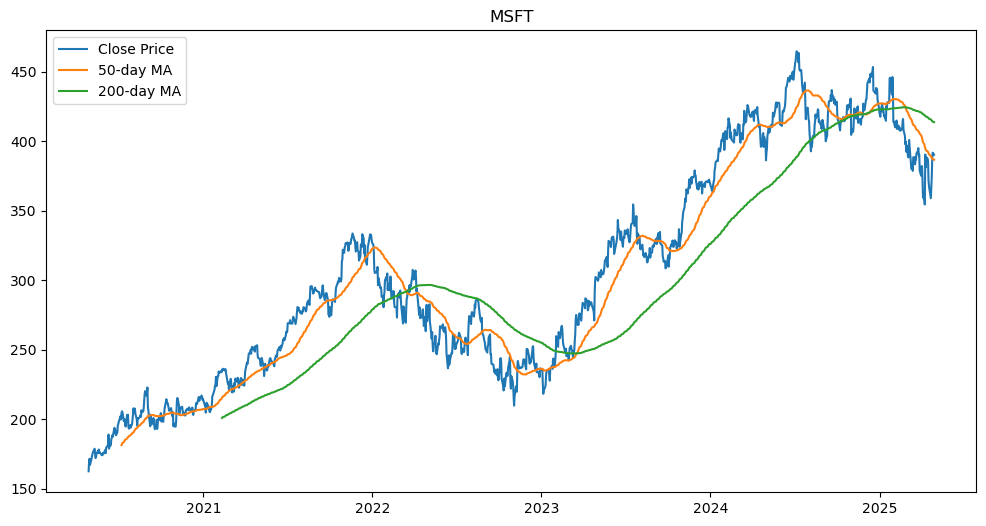

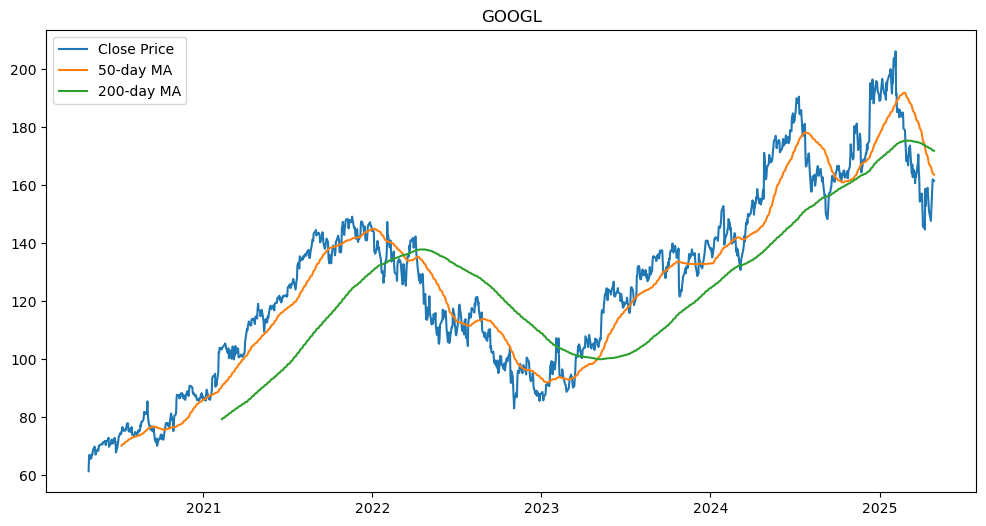

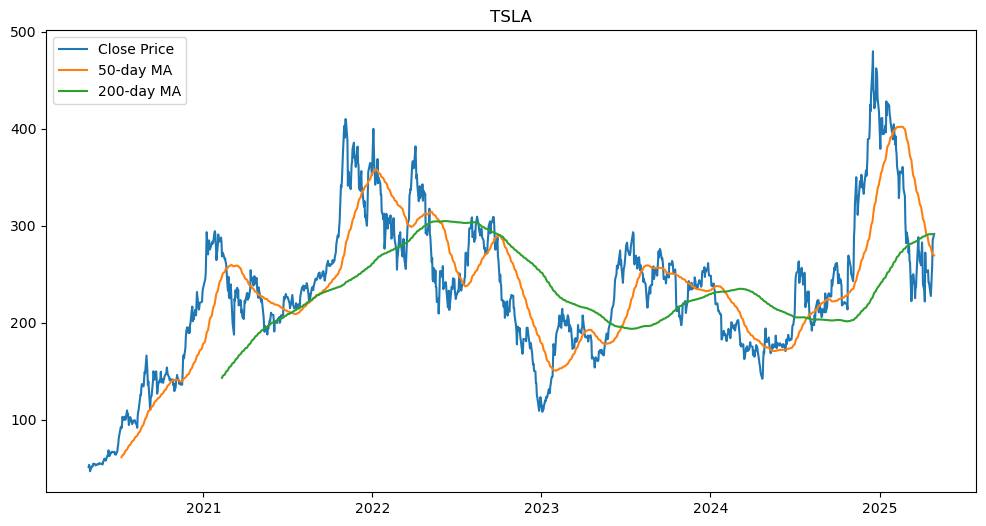

In [23]:
# Plot moving averages
for ticker, df in data.items():
    plt.figure(figsize=(12,6))
    plt.plot(df['Close'], label='Close Price')
    plt.plot(df['50-day MA'], label='50-day MA')
    plt.plot(df['200-day MA'], label='200-day MA')
    plt.title(ticker)
    plt.legend()
    plt.show()

# **Implement Bollinger Bands**

In [39]:
def calculate_bollinger_bands(dataframe: pd.DataFrame, window: int = 20, num_std: float = 2.0) -> pd.DataFrame:
    """
    Calculate Bollinger Bands for a given dataframe.
    
    Args:
        dataframe (pd.DataFrame): DataFrame containing price data with a 'Close' column
        window (int, optional): Rolling window size for moving average. Defaults to 20.
        num_std (float, optional): Number of standard deviations for the bands. Defaults to 2.0.
    
    Returns:
        pd.DataFrame: Original dataframe with added Bollinger Bands columns
    """
    # Create a copy to avoid modifying the original dataframe
    df_copy = dataframe.copy()
    
    # Calculate the rolling mean and standard deviation
    rolling_mean = df_copy['Close'].rolling(window=window).mean()
    rolling_std = df_copy['Close'].rolling(window=window).std()
    
    # Calculate upper and lower Bollinger Bands
    df_copy[f'Upper BB'] = rolling_mean + num_std * rolling_std
    df_copy[f'Lower BB'] = rolling_mean - num_std * rolling_std
    df_copy[f'{window}-day MA'] = rolling_mean
    
    return df_copy

# Apply Bollinger Bands calculation to each ticker's dataframe
for ticker, df in data.items():
    data[ticker] = calculate_bollinger_bands(df)

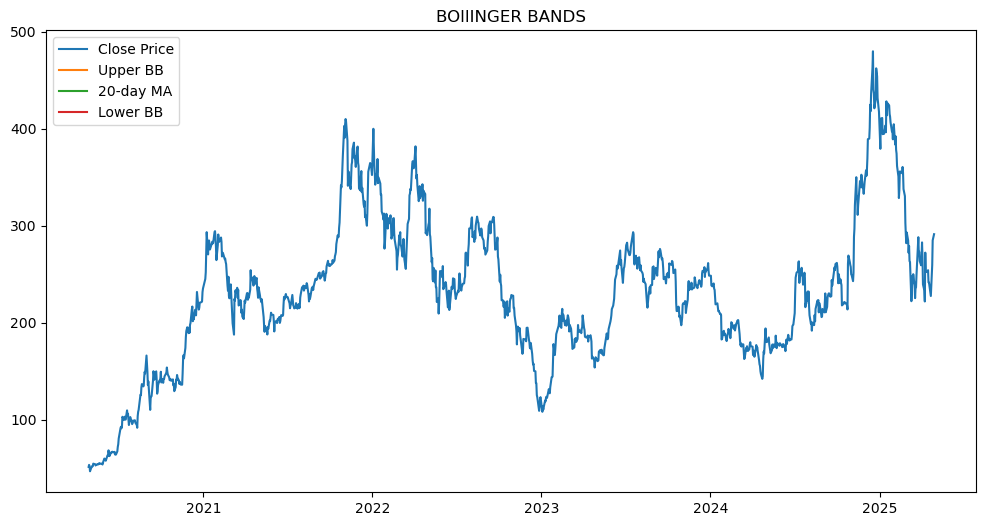

In [53]:
# Plot Bollinger Bands
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['Upper BB'], label='Upper BB')
plt.plot(df['20-day MA'], label='20-day MA')
plt.plot(df['Lower BB'], label='Lower BB')
plt.legend()
plt.title('BOllINGER BANDS')
plt.show()


 **Generate Candlestick Charts and Volume Trend Plots**
1. Use Plotly to create a candlestick chart.
2. Plot the trading volume trend.

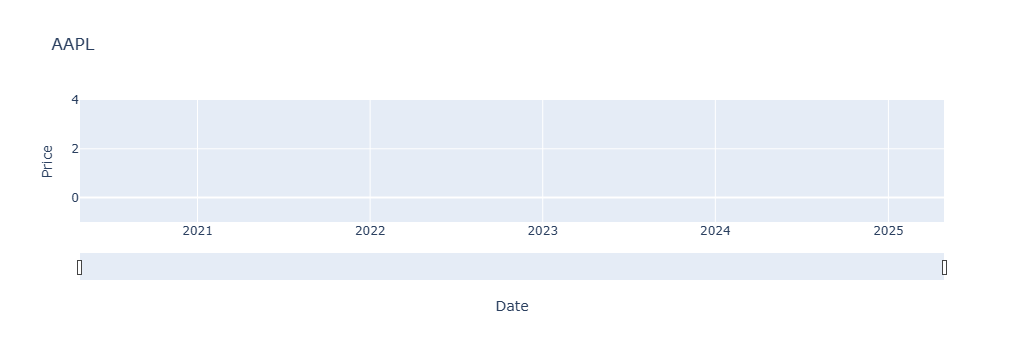

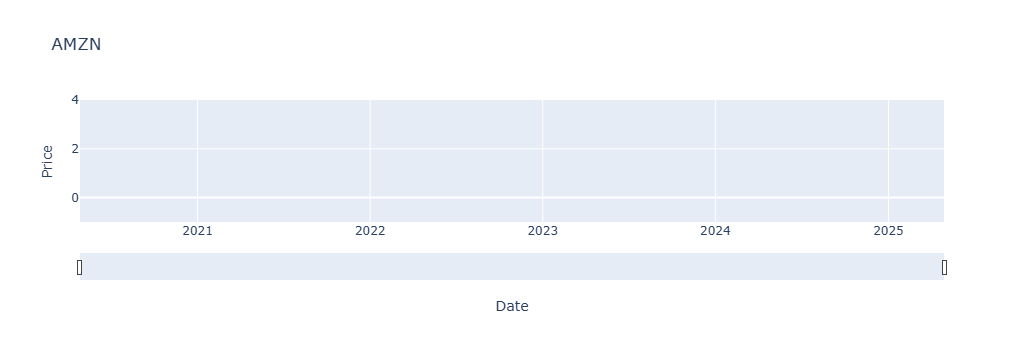

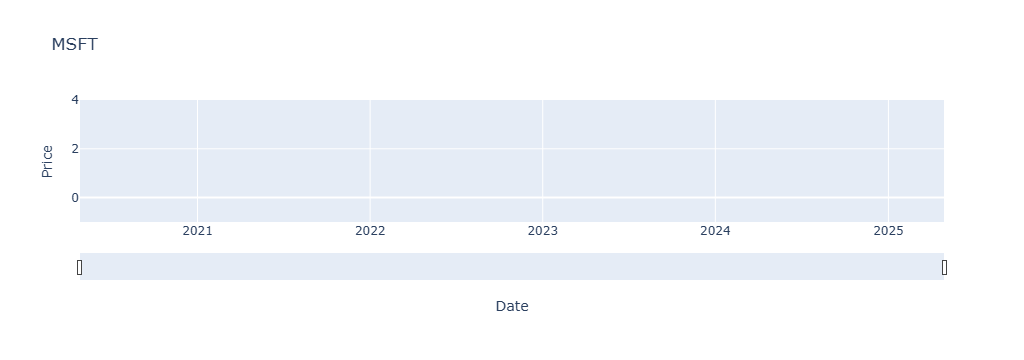

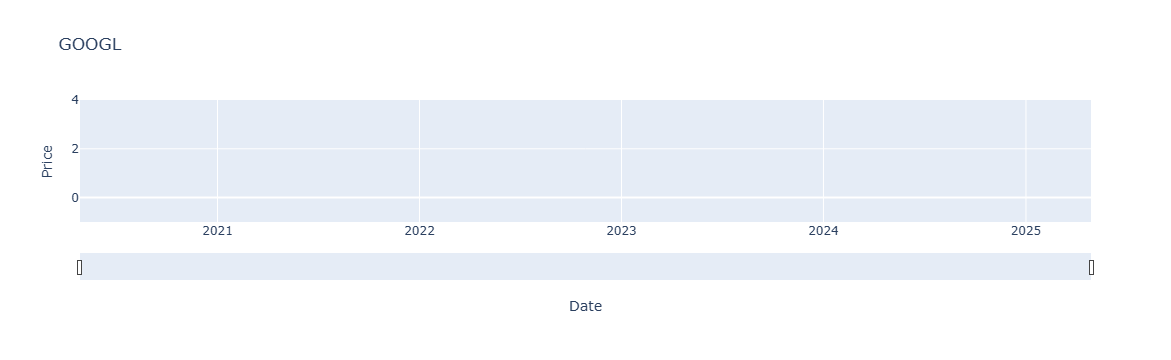

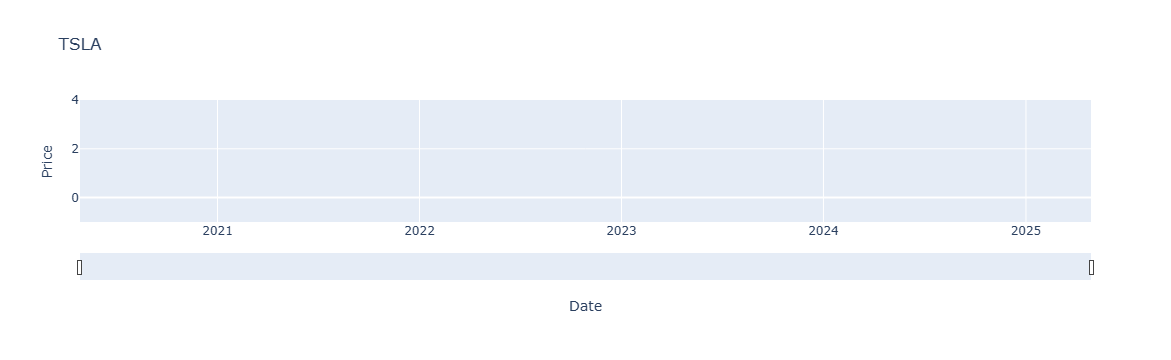

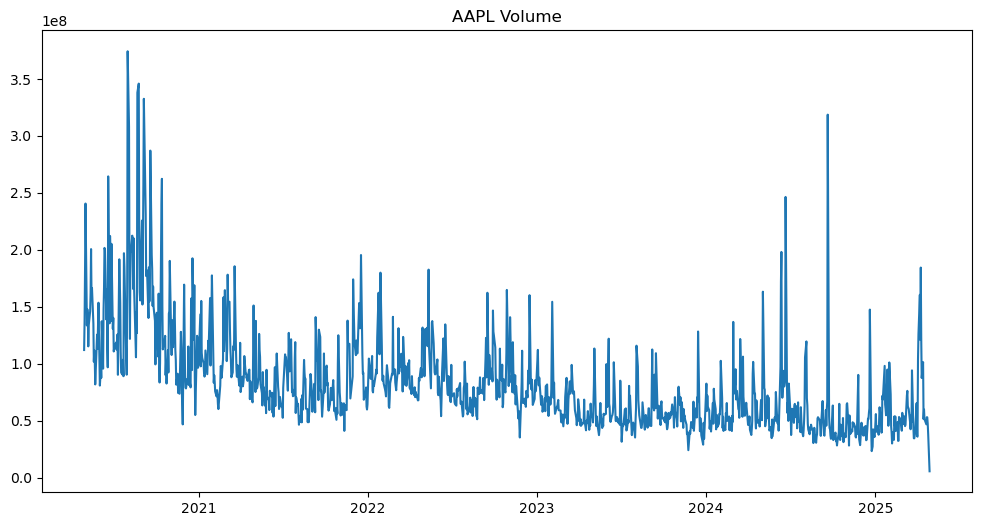

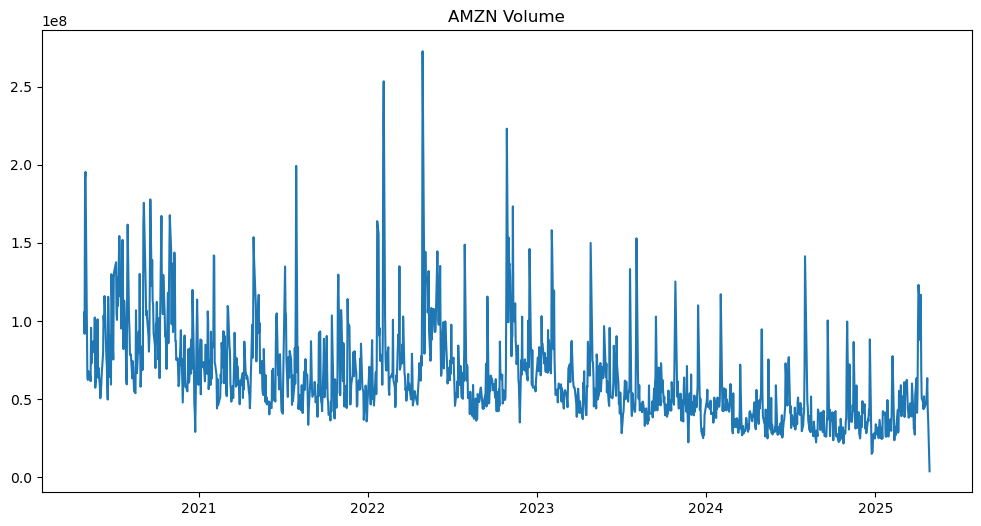

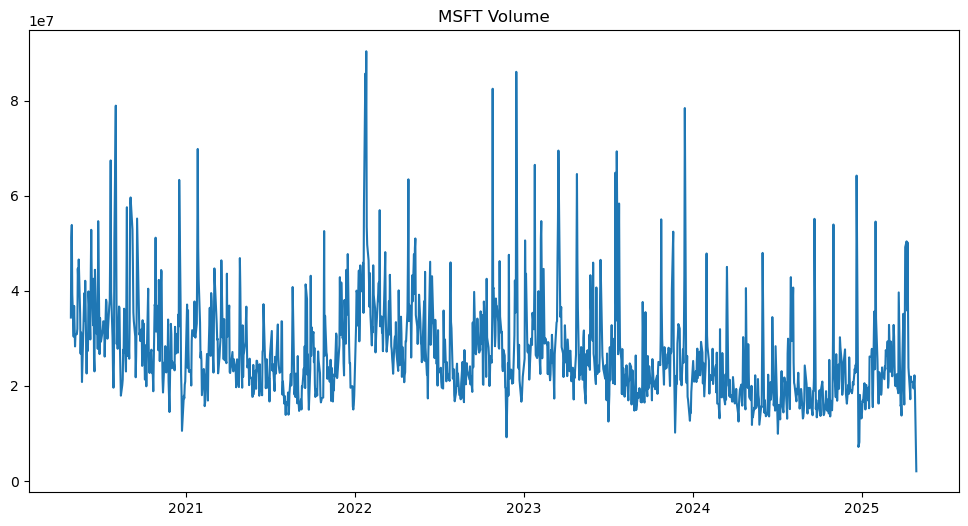

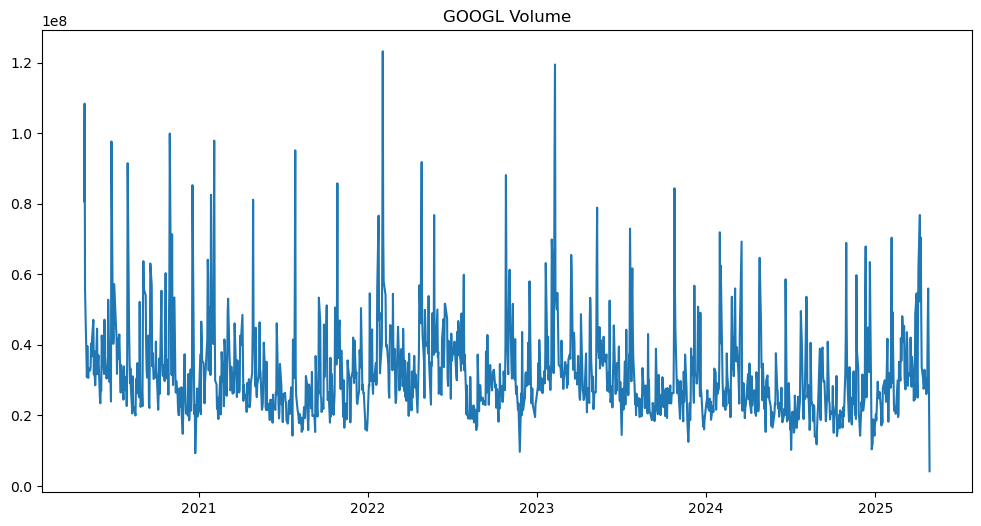

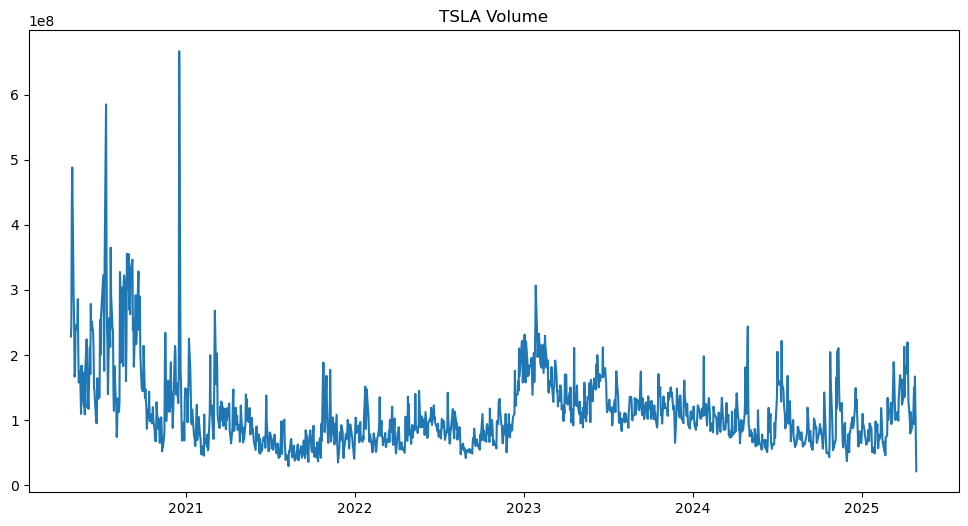

In [45]:
# Plot candlestick charts
for ticker, df in data.items():
    fig = go.Figure(data=[go.Candlestick(x=df.index,
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Close'])])
    fig.update_layout(title=ticker, xaxis_title='Date', yaxis_title='Price')
    fig.show()

# Plot volume trend plots
for ticker, df in data.items():
    plt.figure(figsize=(12,6))
    plt.plot(df['Volume'])
    plt.title(ticker + ' Volume')
    plt.show()


# Summary and Conclusion
The analysis reveals the following key insights:

- The overall price trend for each stock over the past 5 years is positive, with some fluctuations.
- The 50-day and 200-day moving averages indicate a bullish trend for most stocks.
- Bollinger Bands analysis reveals periods of high volatility for each stock.
- Candlestick charts and volume trend plots provide additional insights into price movements and trading activity.

Overall, this analysis demonstrates the importance of using multiple technical indicators to gain a comprehensive understanding of stock market trends. By applying moving averages, Bollinger Bands, and other indicators, investors can make more informed decisions and manage risk more effectively.